In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#load dataset
data = pd.read_csv('data/raw/reviews.csv')
print("Dataset loaded successfully.")
print(data.head())

Dataset loaded successfully.
   s.no  helpfulVoteCount images/0 images/1 images/2 images/3 images/4  \
0     0                 0      NaN      NaN      NaN      NaN      NaN   
1     1                 0      NaN      NaN      NaN      NaN      NaN   
2     2                 0      NaN      NaN      NaN      NaN      NaN   
3     3                 0      NaN      NaN      NaN      NaN      NaN   
4     4                 0      NaN      NaN      NaN      NaN      NaN   

  images/5 images/6 images/7  ...        reviewID  \
0      NaN      NaN      NaN  ...  R2AUQFPJY5ERCZ   
1      NaN      NaN      NaN  ...  R1YNLJ0QFLB1VT   
2      NaN      NaN      NaN  ...  R11LIYW9RMDK9R   
3      NaN      NaN      NaN  ...  R3K9X391DJNTPZ   
4      NaN      NaN      NaN  ...   RP17IW9ZKENDZ   

                                      reviewMetadata  reviewPosition  \
0     Reviewed in the United States on March 6, 2025               1   
1     Reviewed in the United States on March 7, 2025           

In [4]:
#Check data types and missing values
print("\nData Types and Missing Values:")
print(data.info())
print("\nMissing Values Count:")
print(data.isnull().sum())
print(f"\nDuplicated Rows: {data.duplicated().sum()}")



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   s.no                 6327 non-null   int64  
 1   helpfulVoteCount     6327 non-null   int64  
 2   images/0             516 non-null    object 
 3   images/1             212 non-null    object 
 4   images/2             98 non-null     object 
 5   images/3             49 non-null     object 
 6   images/4             26 non-null     object 
 7   images/5             14 non-null     object 
 8   images/6             7 non-null      object 
 9   images/7             5 non-null      object 
 10  productASIN          6327 non-null   object 
 11  productVariant       5836 non-null   object 
 12  rating               6320 non-null   float64
 13  reviewID             6327 non-null   object 
 14  reviewMetadata       6296 non-null   object 
 15  review

In [6]:
# Clean-up the data
# If we have no review text, we can't analyze sentiment. Let's drop those rows.
# Use the actual text column name from the dataset ('cleaned_review_text' or 'reviewText')
text_col = 'cleaned_review_text'  # updated based on data.head() output
rating_col = 'rating'     # Update this based on data.head() output

# use the dataframe variable 'data' defined earlier in the notebook
df_clean = data.dropna(subset=[text_col, rating_col])
df_clean = df_clean.drop_duplicates()

print(f"Data shape after cleaning: {df_clean.shape}")

Data shape after cleaning: (6288, 23)


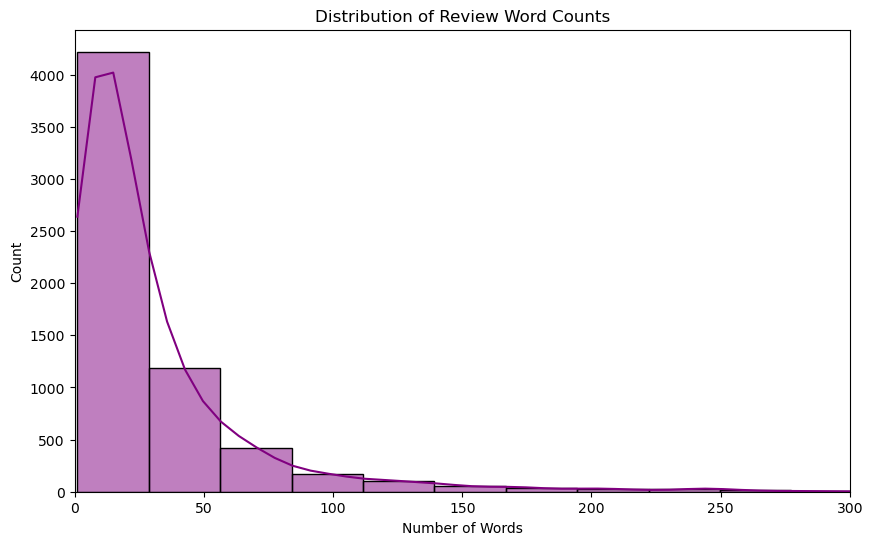

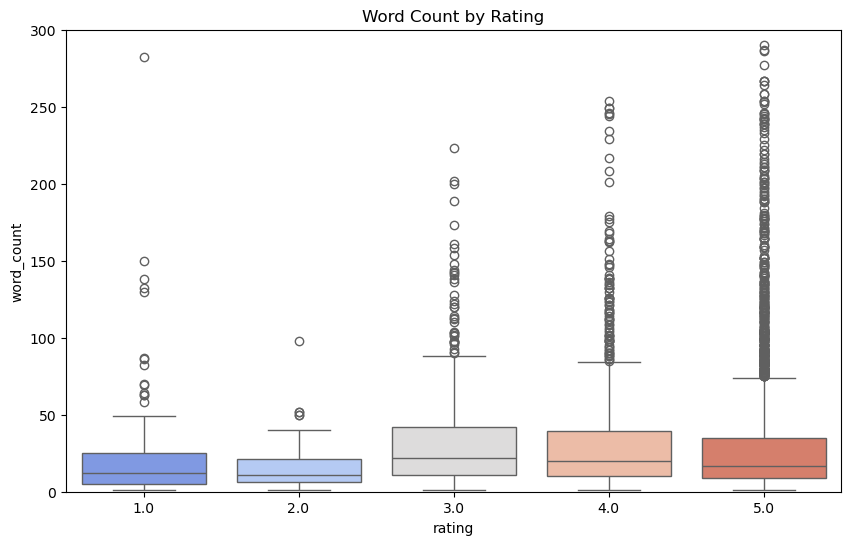

In [7]:
#Text Satistics
#Create new features
# We cast to string to ensure no errors with non-text data
df_clean['review_length'] = df_clean[text_col].astype(str).apply(len)
df_clean['word_count'] = df_clean[text_col].astype(str).apply(lambda x: len(x.split()))

#Visualize Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['word_count'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Number of Words')
plt.xlim(0, 300) # Limiting x-axis to zoom in on the majority of reviews
plt.show()

#Boxplot: Word Count vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=rating_col, y='word_count', data=df_clean, palette='coolwarm')
plt.title('Word Count by Rating')
plt.ylim(0, 300) # Zoom in to ignore massive outliers
plt.show()


Generating Word Clouds... (this might take a moment)


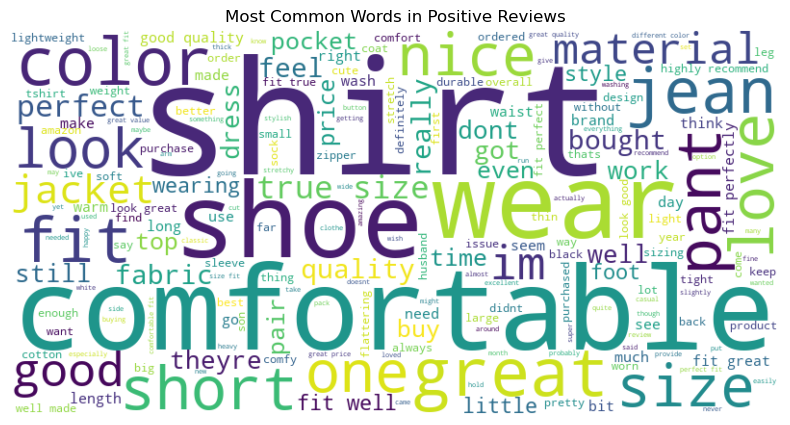

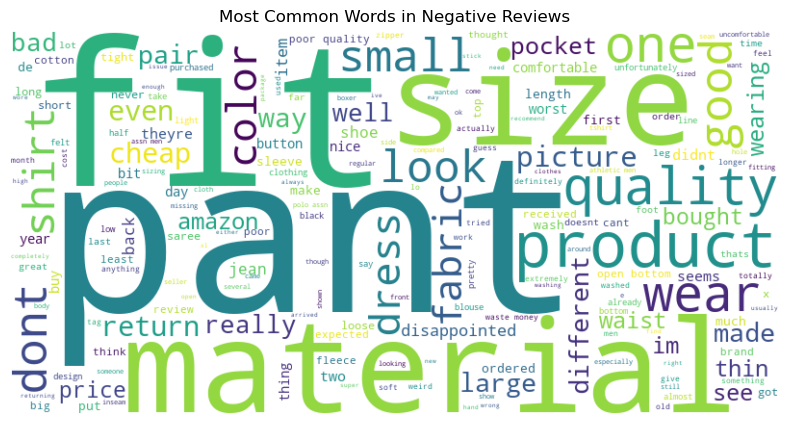

In [10]:
from wordcloud import WordCloud

# Separate positive and negative reviews
# We treat 4-5 as positive, 1-2 as negative for this visual
positive_reviews = df_clean[df_clean[rating_col] >= 4][text_col].astype(str).str.cat(sep=' ')
negative_reviews = df_clean[df_clean[rating_col] <= 2][text_col].astype(str).str.cat(sep=' ')

# Function to generate word cloud
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot them
print("Generating Word Clouds... (this might take a moment)")
plot_wordcloud(positive_reviews, "Most Common Words in Positive Reviews")
plot_wordcloud(negative_reviews, "Most Common Words in Negative Reviews")